In [9]:
import matplotlib.pyplot as plt
import numpy as np

In [13]:
test_case_path = "test_case3_stepby_10k.csv"

In [14]:
ns = np.arange(100_000, 1_000_001, 100_000)
max_num = 1_000_000

In [15]:
lines = []

for n in ns:
    nums = np.random.randint(0, max_num, size=n)
    nums = [str(x) for x in nums]
    lines.append(",".join(nums) + "\n")

with open(test_case_path, "w") as file:
    file.writelines(lines)

## run rust algorithm here

In [37]:
rp_path = "test_case3_stepby_10k_rp.csv"
mof_path = "test_case3_stepby_10k_mof.csv"
n_stepby = 100_000
stepby = 10_000

In [38]:
# Read results from algorithms

def file_to_array(path):
    with open(path, "r") as file:
        lines = file.readlines()
    arr = []
    for n, line in enumerate(lines):
        counts = line.strip().split(",")
        counts = [int(x) for x in counts if x not in ("",)]
        for i, count in enumerate(counts):
            arr.append([n * n_stepby, i * stepby, count])
    return np.array(arr)

# def ns_to_array(ns_path):
#     with open(ns_path, "r") as file:
#         lines = file.readlines()
#     ns = lines[0].strip().split(",")
#     ns = [int(x) for x in ns]
#     return np.array(ns)

def plot_array(arr, fig=None, dx=None, dy=None, pos=111):
    # x axis = n
    # y axis = i
    # z axis = count
    ns, is_, counts = arr.T
    
    if dx is None:
        dx = np.ones(len(arr))
    else:
        temp = np.empty(len(arr))
        temp[:] = dx
        dx = temp
    if dy is None:
        dy = np.ones(len(arr))
    else:
        temp = np.empty(len(arr))
        temp[:] = dy
        dy = temp
    zeros = np.zeros(len(arr))
    if fig is None:
        fig = plt.figure()
    ax = fig.add_subplot(pos, projection='3d')

    cmap = plt.get_cmap('viridis')
    max_height = arr[:, 2].max()
    rgba = [cmap(k / max_height) for k in arr[:, 2]]

    ax.bar3d(ns, is_, zeros, dx, dy, counts, color=rgba)
    ax.set_xlabel("n")
    ax.set_ylabel("i")
    ax.set_zlabel("# of comparisons")

    return fig, ax


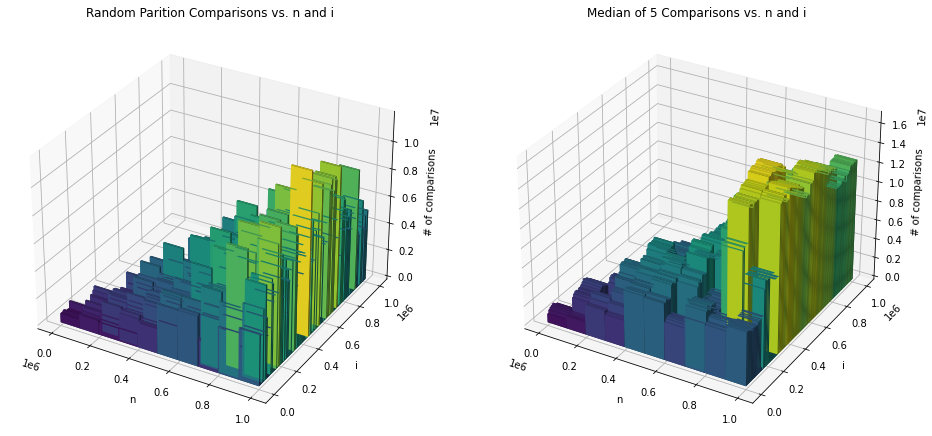

In [39]:
fig = plt.figure(figsize=(16, 12))

rp_arr = file_to_array(rp_path)
# rp_arr[0] *= 100_000
# rp_arr[1] *= stepby
_, rp_ax = plot_array(rp_arr, fig=fig, pos=121, dx=100_000, dy=stepby)
rp_ax.set_title("Random Parition Comparisons vs. n and i")

mof_arr = file_to_array(mof_path)
# mof_arr[0] *= 100_000
# mof_arr[1] *= stepby
_, mof_ax = plot_array(mof_arr, fig=fig, pos=122, dx=100_000, dy=stepby)
mof_ax.set_title("Median of 5 Comparisons vs. n and i")
plt.show()


In [52]:
def file_to_jagged_array(path):
    with open(path, "r") as file:
        lines = file.readlines()
    arr = []
    for n, line in enumerate(lines):
        counts = line.strip().split(",")
        counts = [int(x) for x in counts if x not in ("",)]
        arr.append(counts)
    return arr

def plot_jarray_2d(jarr, fig=None, pos=111):
    if fig is None:
        fig = plt.figure()
    ax = fig.add_subplot(pos)

    for n, counts in enumerate(jarr):
        n *= n_stepby
        is_ = stepby * np.arange(len(counts))
        ax.plot(is_, counts, label=f"n = {n}")

    ax.set_xlabel("i")
    ax.set_ylabel("# of comparisons")
    ax.legend()

    return fig, ax

def plot_jarray_2d_by_n(jarr, fig=None, pos=111):
    if fig is None:
        fig = plt.figure()
    ax = fig.add_subplot(pos)
    
    i_max = max([len(ns) for ns in jarr])
    for i in range(i_max):
        ns = []
        count_by_n = []
        for n, counts in enumerate(jarr):
            if i < len(counts):
                ns.append(n * n_stepby)
                count_by_n.append(counts[i])
        
        ax.plot(ns, count_by_n, label=f"i = {i}")
    
    ax.set_xlabel("n")
    ax.set_ylabel("# of comparisons")
    # ax.legend()

    return fig, ax


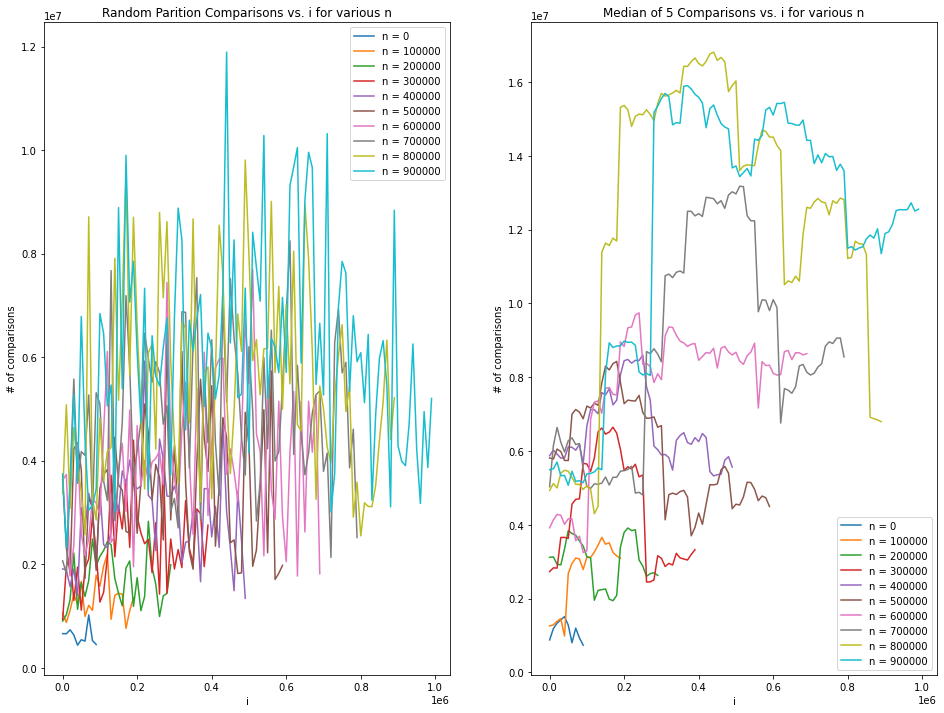

In [43]:
fig = plt.figure(figsize=(16, 12))

rp_jarr = file_to_jagged_array(rp_path)
_, rp_ax = plot_jarray_2d(rp_jarr, fig=fig, pos=121)
rp_ax.set_title("Random Parition Comparisons vs. i for various n")

mof_jarr = file_to_jagged_array(mof_path)
_, mof_ax = plot_jarray_2d(mof_jarr, fig=fig, pos=122)
mof_ax.set_title("Median of 5 Comparisons vs. i for various n")
plt.show()

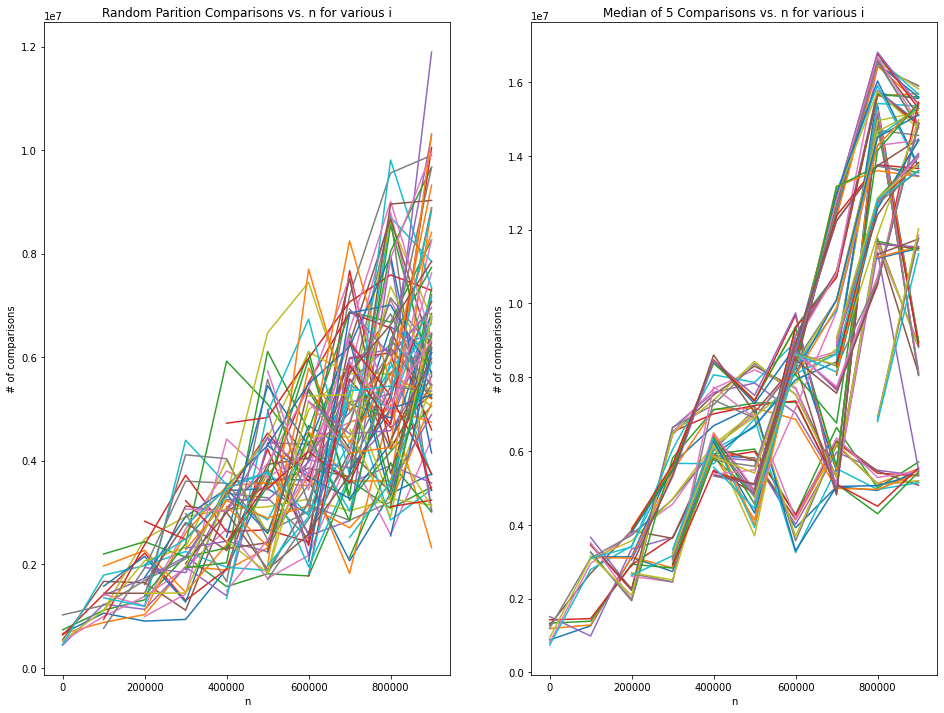

In [53]:
fig = plt.figure(figsize=(16, 12))

rp_jarr = file_to_jagged_array(rp_path)
_, rp_ax = plot_jarray_2d_by_n(rp_jarr, fig=fig, pos=121)
rp_ax.set_title("Random Parition Comparisons vs. n for various i")

mof_jarr = file_to_jagged_array(mof_path)
_, mof_ax = plot_jarray_2d_by_n(mof_jarr, fig=fig, pos=122)
mof_ax.set_title("Median of 5 Comparisons vs. n for various i")
plt.show()